In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Bigdata/coronavirus.csv')

# Preprocess data
def preprocess_data(df):
    # Create a condition based on 'num_comments' and 'upvote_ratio'
    condition = (df['num_comments'] > 1500) & (df['upvote_ratio'] > 0.86)

    # Assign 1 to 'is_popular' if the condition is met, 0 otherwise
    df['is_popular'] = condition.astype(int)

    return df

# Example usage:
df = preprocess_data(df)

df

,author,created_utc,id,is_original_content,is_self,link_flair_text,locked,name,num_comments,over_18,permalink,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url,is_popular
0,Franky_95,1.584892e+09,fn1mtn,False,False,Europe (/r/all),False,t3_fn1mtn,1784,False,/r/Coronavirus/comments/fn1mtn/gino_fasoli_was...,122960,NaN,False,False,Coronavirus,Gino Fasoli was 73 years old. He was italian a...,0.96,https://www.corriere.it/cronache/20_marzo_21/c...,1
1,willmannix123,1.588628e+09,gdkt54,False,False,Good News,False,t3_gdkt54,2305,False,/r/Coronavirus/comments/gdkt54/irish_people_he...,122571,NaN,False,False,Coronavirus,Irish people help raise 1.8 million dollars fo...,0.96,https://www.independent.ie/world-news/coronavi...,1
2,gluuey,1.584899e+09,fn3j0w,False,False,Video/Image (/r/all),False,t3_fn3j0w,2167,False,/r/Coronavirus/comments/fn3j0w/how_to_stop_a_v...,110029,NaN,False,False,Coronavirus,How to stop a virus from spreading,0.96,https://thespinoff.co.nz/wp-content/uploads/20...,1
3,mich4725,1.586377e+09,fxdwoa,False,False,Good News (/r/all),False,t3_fxdwoa,2423,False,/r/Coronavirus/comments/fxdwoa/all_11_coronavi...,106706,NaN,False,False,Coronavirus,All 11 Coronavirus patients in Greenland have ...,0.97,https://nun.gl/Emner/Borgere/Coronavirus_emne/...,1
4,ssldvr,1.584324e+09,fjcz60,False,False,Good News (/r/all),False,t3_fjcz60,1371,False,/r/Coronavirus/comments/fjcz60/an_italian_hosp...,101353,NaN,False,False,Coronavirus,An Italian hospital ran out of ICU valves. A l...,0.97,https://twitter.com/michalnaka/status/12393162...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Fundshat,1.680904e+09,12f0q9e,False,False,USA,True,t3_12f0q9e,90,False,/r/Coronavirus/comments/12f0q9e/florida_health...,5368,NaN,False,False,Coronavirus,Florida health officials removed key data from...,0.96,https://www.orlandosentinel.com/coronavirus/os...,0
984,dt4861,1.675750e+09,10vubdi,False,False,Science,False,t3_10vubdi,598,False,/r/Coronavirus/comments/10vubdi/yes_masks_redu...,5272,NaN,False,False,Coronavirus,"Yes, masks reduce the risk of spreading COVID,...",0.91,https://theconversation.com/yes-masks-reduce-t...,0
985,hexagonincircuit1594,1.685752e+09,13yusaz,False,False,USA,False,t3_13yusaz,238,False,/r/Coronavirus/comments/13yusaz/more_than_70_o...,3316,NaN,False,False,Coronavirus,More than 70% of US household COVID spread sta...,0.97,https://www.cidrap.umn.edu/covid-19/more-70-us...,0
986,hexagonincircuit1594,1.698838e+09,17l9ya8,False,False,Science,False,t3_17l9ya8,631,False,/r/Coronavirus/comments/17l9ya8/face_masks_war...,3150,NaN,False,False,Coronavirus,"Face masks ward off covid-19, so why are we st...",0.84,https://www.newscientist.com/article/2400394-f...,0


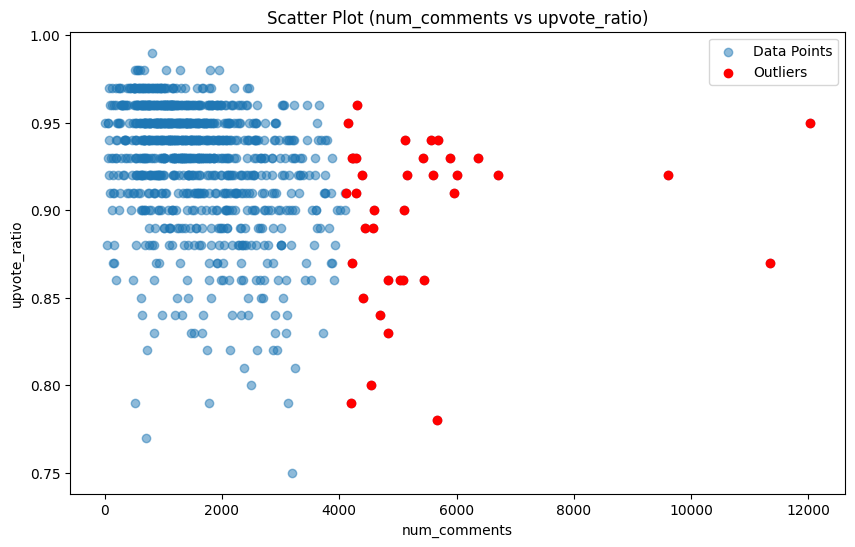

In [ ]:
# Specify the columns for the scatter plot
x_column = 'num_comments'
y_column = 'upvote_ratio'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5, label='Data Points')

# Identify and highlight outliers
Q1 = df[x_column].quantile(0.25)
Q3 = df[x_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[x_column] < lower_bound) | (df[x_column] > upper_bound)]

plt.scatter(outliers[x_column], outliers[y_column], color='red', label='Outliers')

# Set labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot ({x_column} vs {y_column})')


plt.legend()
plt.show()


In [ ]:
# Define the target variable and features
target_column = 'is_popular'
features = ['num_comments', 'score', 'upvote_ratio']

In [ ]:
# Split the data into features and target variable
X = df[features]
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
value_counts = y.value_counts()

# Print the result
print(value_counts)

0    586
1    402
Name: is_popular, dtype: int64


In [ ]:
min_upvote_ratio = df['upvote_ratio'].min()
max_upvote_ratio = df['upvote_ratio'].max()

print(f"Minimum upvote_ratio: {min_upvote_ratio}")
print(f"Maximum upvote_ratio: {max_upvote_ratio}")

Minimum upvote_ratio: 0.75
Maximum upvote_ratio: 0.99


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# fit the training dataset on the KNN classifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
# predict the labels on validation dataset
predictions = clf.predict(X_test)
# Use accuracy_score function to get the accuracy
print("KNeighborsClassifier Accuracy -> {:.2%}".format(accuracy_score(predictions, y_test)))
print(classification_report(predictions,y_test))

KNeighborsClassifier Accuracy -> 88.89%
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       119
           1       0.88      0.84      0.86        79

    accuracy                           0.89       198
   macro avg       0.89      0.88      0.88       198
weighted avg       0.89      0.89      0.89       198



In [ ]:
from sklearn.linear_model import LogisticRegression

# fit the training dataset on the LR classifier
clf = LogisticRegression()
clf.fit(X_train,y_train)
# predict the labels on validation dataset
predictions = clf.predict(X_test)
# Use accuracy_score function to get the accuracy
print("LogisticRegression Accuracy -> {:.2%}".format(accuracy_score(predictions, y_test)))
print(classification_report(predictions,y_test))

LogisticRegression Accuracy -> 85.86%
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       131
           1       0.76      0.85      0.80        67

    accuracy                           0.86       198
   macro avg       0.84      0.86      0.85       198
weighted avg       0.86      0.86      0.86       198



In [ ]:
from textblob import TextBlob

# Perform sentiment analysis using TextBlob
df['sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map sentiment polarity to positive, negative, or neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Print the result
print(df[['title', 'sentiment_label']])

                                                 title sentiment_label
0    Gino Fasoli was 73 years old. He was italian a...        negative
1    Irish people help raise 1.8 million dollars fo...        negative
2                   How to stop a virus from spreading         neutral
3    All 11 Coronavirus patients in Greenland have ...        positive
4    An Italian hospital ran out of ICU valves. A l...        negative
..                                                 ...             ...
983  Florida health officials removed key data from...         neutral
984  Yes, masks reduce the risk of spreading COVID,...         neutral
985  More than 70% of US household COVID spread sta...        positive
986  Face masks ward off covid-19, so why are we st...         neutral
987  Why aren’t we hearing about COVID waves anymor...        positive

[988 rows x 2 columns]


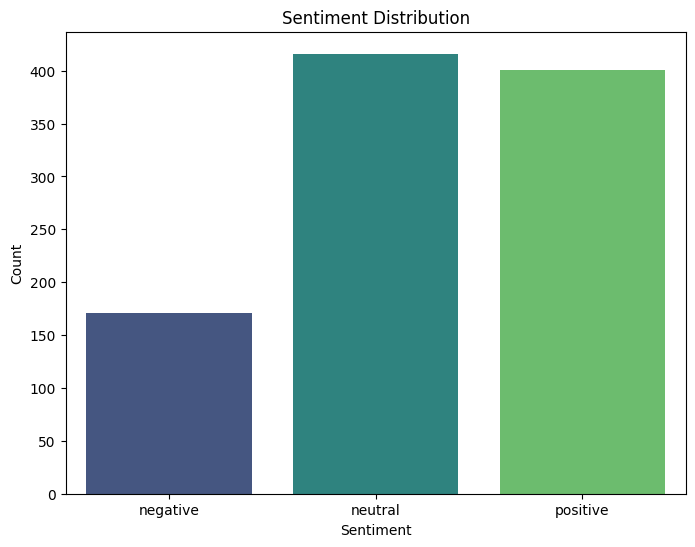

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

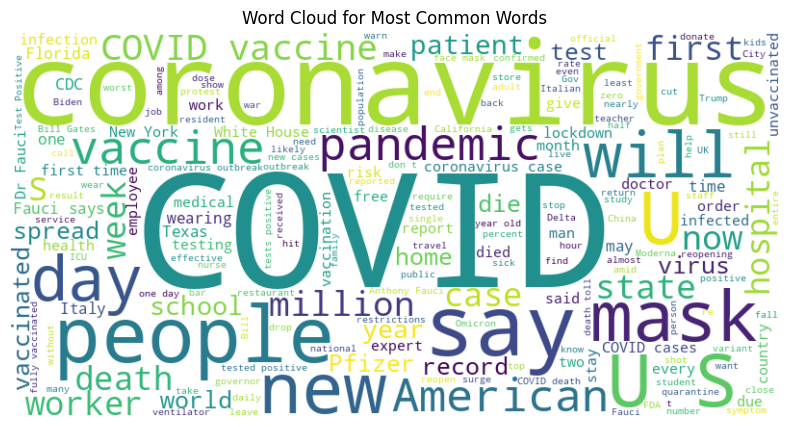

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from 'title'
all_text = ' '.join(df['title'])

# Create WordCloud for most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words')
plt.axis('off')
plt.show()

In [ ]:
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

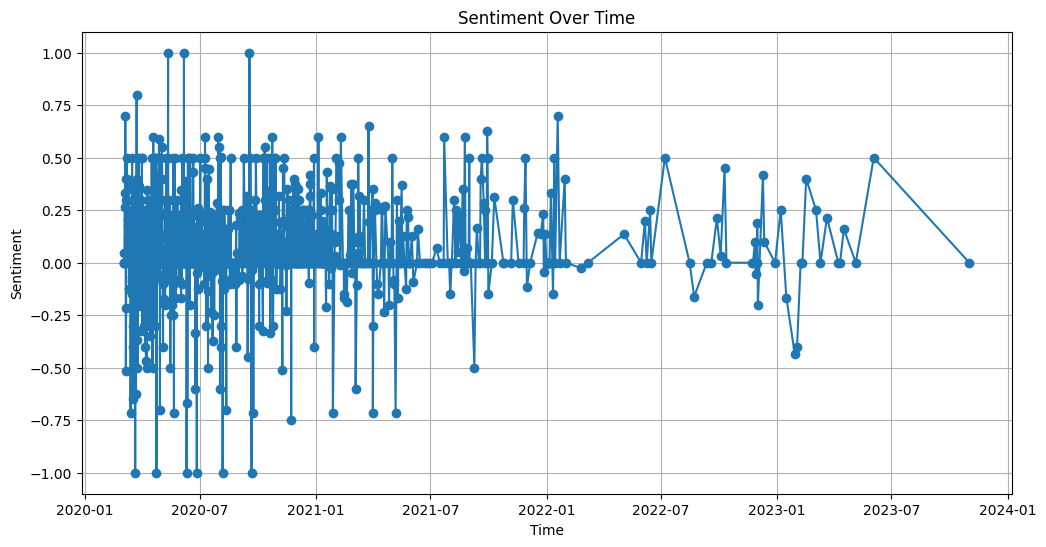

In [ ]:
# Sort the DataFrame by 'created_utc'
df.sort_values(by='created_utc', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['created_utc'], df['sentiment'], marker='o', linestyle='-')
plt.title('Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()

Target column = 'is_popular'​

Condition = 'num_comments' > 1500 and 'upvote_ratio' > 0.88.​

Features used were 'num_comments', 'upvote_ratio' and 'score'.